# 0.0 DATA IMPORTS

In [9]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image
import inflection
import datetime


## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 20
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

jupyter_settings()

def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading Data

In [5]:
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)


In [6]:
print(df_store_raw.shape) # 1115 stores, 10 columns
print(df_sales_raw.shape) #1017209 sales, 9 columns
print(df_sales_raw.columns.to_list()) #1017209 sales, 9 columns
print(df_store_raw.columns.to_list()) # 1115 stores, 10 columns

(1115, 10)
(1017209, 9)
['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [7]:
# merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how = 'left', on = 'Store')
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 1.0. PASSO 01 - DESCRIÇÃO DOS DADOS

## 1.1. Rename Columns

In [8]:
df1 = df_raw.copy()

In [9]:
old_cols = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
            'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
            'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

In [10]:
# using snakecase
new_cols = list(map(lambda x: inflection.underscore(x), old_cols))
new_cols
df1.columns = new_cols
df1.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 1.2. Data Dimensions

In [11]:
print(f'# rows: {df1.shape[0]} | # columns: {df1.shape[1]}')

# rows: 1017209 | # columns: 18


## 1.3. Data Types

In [12]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Checking & Filling out NA Values

In [13]:
missing_percentage(df1)

,Total,Percent
promo_interval,508031,49.94
promo2_since_week,508031,49.94
promo2_since_year,508031,49.94
competition_open_since_year,323348,31.79
competition_open_since_month,323348,31.79
competition_distance,2642,0.26


### 1.4.1. competition_distance

In [14]:
# df1.loc[df1['competition_distance'].isna() , ['competition_distance', 'store','competition_open_since_year']]
# df1['competition_distance'].describe()
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

### 1.4.2. competition_open_since_month & competition_open_since_year

In [15]:
# checking unique values. If zero, all values are NaN
# df1[df1['competition_open_since_year'].isna() & 
#     df1['competition_open_since_month'].isna()]['competition_open_since_month'].nunique()
# df1[df1['competition_open_since_year'].isna() & 
#     df1['competition_open_since_month'].isna()]['competition_open_since_year'].nunique()

In [16]:
df1['date'].value_counts(ascending = True)

2014-10-23     935
2014-12-08     935
2014-07-01     935
2014-10-20     935
2014-10-28     935
              ... 
2013-03-30    1115
2014-04-12    1115
2015-04-25    1115
2013-07-22    1115
2015-06-09    1115
Name: date, Length: 942, dtype: int64

In [17]:
# df1['competition_open_since_month'].describe()
# df1['competition_open_since_year'].describe()

df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month 
                                                if math.isnan( x['competition_open_since_month'] ) 
                                                else x['competition_open_since_month'], axis=1 )

df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year 
                                               if math.isnan( x['competition_open_since_year'] ) 
                                               else x['competition_open_since_year'], axis=1 )


### 1.4.3. promo2_since_year & promo2_since_week

In [18]:
# checking unique values
df1[df1['promo2_since_year'].isna() & 
    df1['promo2_since_week'].isna() & df1['promo_interval'].isna()]['promo2'].value_counts()

0    508031
Name: promo2, dtype: int64

In [19]:
# df1['promo2_since_year'].describe() # a year has approx 52 weeks.
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year 
                                     if math.isnan(x['promo2_since_year']) 
                                     else x['promo2_since_year'], axis = 1)

df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week 
                                     if math.isnan(x['promo2_since_week']) 
                                     else x['promo2_since_week'], axis = 1)


### 1.4.4. promo_interval

In [20]:
#df1[df1['promo_interval'].isna()]['promo2'].value_counts() 
#df1['promo_interval'].value_counts()
month_map = {1: 'Jan',  2: 'Fev',  3: 'Mar',  4: 'Apr',  5: 'May', 
             6: 'Jun',  7: 'Jul',  8: 'Aug',  9: 'Sep',  10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['month_map'] = df1['date'].dt.month.map(month_map)
df1['promo_interval'].fillna(0, inplace = True)
df1.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,31.0,2015.0,0,Jul
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Jul
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",Jul
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,31.0,2015.0,0,Jul
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,31.0,2015.0,0,Jul


In [21]:
# New variable is_promo. Checks whether the store is running a consecutive promo on the sales date.

df1['is_promo2'] = df1.apply(lambda x: 0 if x['promo_interval'] == 0 
                            else 1 if x['month_map'] in x['promo_interval'].split(',') 
                            else 0, axis = 1)

In [22]:
missing_percentage(df1)

,Total,Percent


## 1.5. Change Dtypes

In [23]:
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int) 
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int) 
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int) 
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int) 
# df1['month_map'] = df1['month_map'].astype(str) 
# df1['promo_interval'] = df1['promo_interval'].astype(str) 
# df1['assortment'] = df1['assortment'].astype(str) 
# df1['store_type'] = df1['store_type'].astype(str) 
# df1['state_holiday'] = df1['state_holiday'].astype(str) 


In [24]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [25]:
df1['competition_open_since_year'].value_counts()

2013    204636
2014    182822
2015    110108
2012     74299
2005     56564
         ...  
1994      1884
1995      1700
1998       942
1961       942
1900       758
Name: competition_open_since_year, Length: 23, dtype: int64

## 1.7. Descriptive Statistics

In [26]:
num_feat = df1.select_dtypes( include = ['int64','float64'])
cat_feat = df1.select_dtypes( exclude = ['int64','float64','datetime64[ns]'])

In [27]:
num_feat.head(1)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
0,1,5,5263,555,1,1,1,1270.0,9,2008,0,31,2015,0


In [28]:
cat_feat.head(1)

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul


### 1.7.1. Numerical Features

In [29]:
#### Central Tendency 
# 1st moment (mean)
ct_mean = pd.DataFrame(num_feat.apply( np.mean )).T
# median
ct_median = pd.DataFrame(num_feat.apply( np.median )).T

#### Dispersion
# 2nd moment (variance)
d_var = pd.DataFrame(num_feat.apply( np.var)).T
# std
d_std = pd.DataFrame(num_feat.apply( np.std)).T
# min
d_min = pd.DataFrame(num_feat.apply(min)).T
# max
d_max = pd.DataFrame(num_feat.apply(max)).T
# range
d_range = pd.DataFrame(num_feat.apply(lambda x: x.max() - x.min())).T
# 3rd moment (Skew)
d_sk = pd.DataFrame(num_feat.apply(lambda x: x.skew())).T
# 4th moment (Kurtosis)
d_kurt = pd.DataFrame(num_feat.apply(lambda x: x.kurtosis())).T
# Q1 quantile
d_q1 = pd.DataFrame(num_feat.apply(lambda x: np.quantile(x, .25))).T
# Q3 quantile
d_q3 = pd.DataFrame(num_feat.apply(lambda x: np.quantile(x, .75))).T


In [30]:
# concatenate
m = pd.concat([d_min, d_max, d_range, ct_mean, d_q1, ct_median, d_q3, d_std, d_sk, d_kurt]).T.reset_index()
m.columns = ['attributes', 'min', 'max','range','mean','25%', '50%','75%','std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,25%,50%,75%,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,280.0,558.0,838.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,2.0,4.0,6.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,3727.0,5744.0,7856.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,405.0,609.0,837.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,1.0,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.0,1.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.0,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,710.0,2330.0,6910.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,4.0,7.0,10.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2008.0,2012.0,2014.0,5.515591,-7.235657,124.071304


### 1.7.2. Categorical Features

In [31]:
cat_feat.apply(lambda x: x.nunique())

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

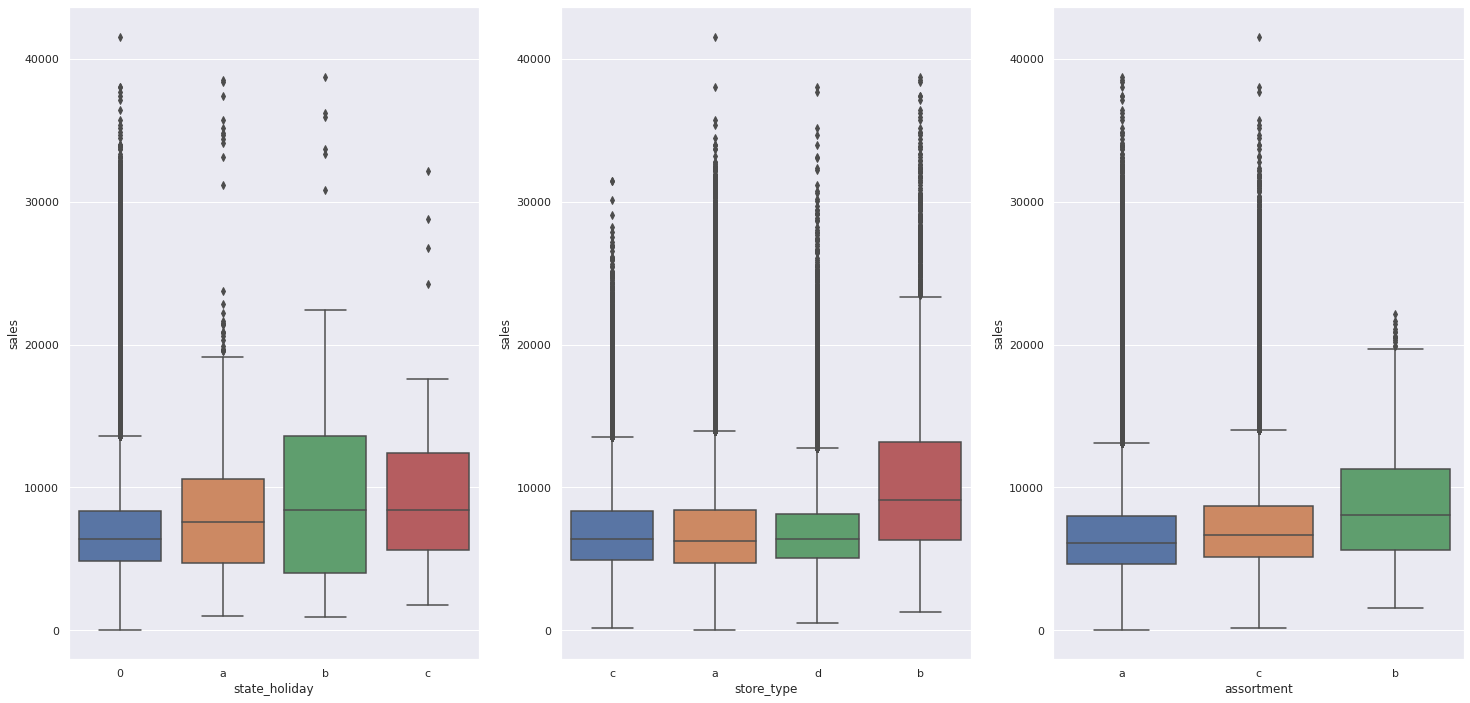

In [33]:
aux1 = df1[(df1['state_holiday'] != 0) & (df1['sales'] != 0)]

plt.subplot(1,3,1)
sns.boxplot(x = 'state_holiday', y = 'sales', data = aux1);

plt.subplot(1,3,2)
sns.boxplot(x = 'store_type', y = 'sales', data = aux1);

plt.subplot(1,3,3)
sns.boxplot(x = 'assortment', y = 'sales', data = aux1);


In [36]:
df1.to_csv(r'data\df1.csv', index = False)

# 2.0. STEP 02 - FEATURE ENGINEERING

In [ ]:
df2 = pd.read_csv('data/df1.csv')

## 2.1. Hypothesis MindMap

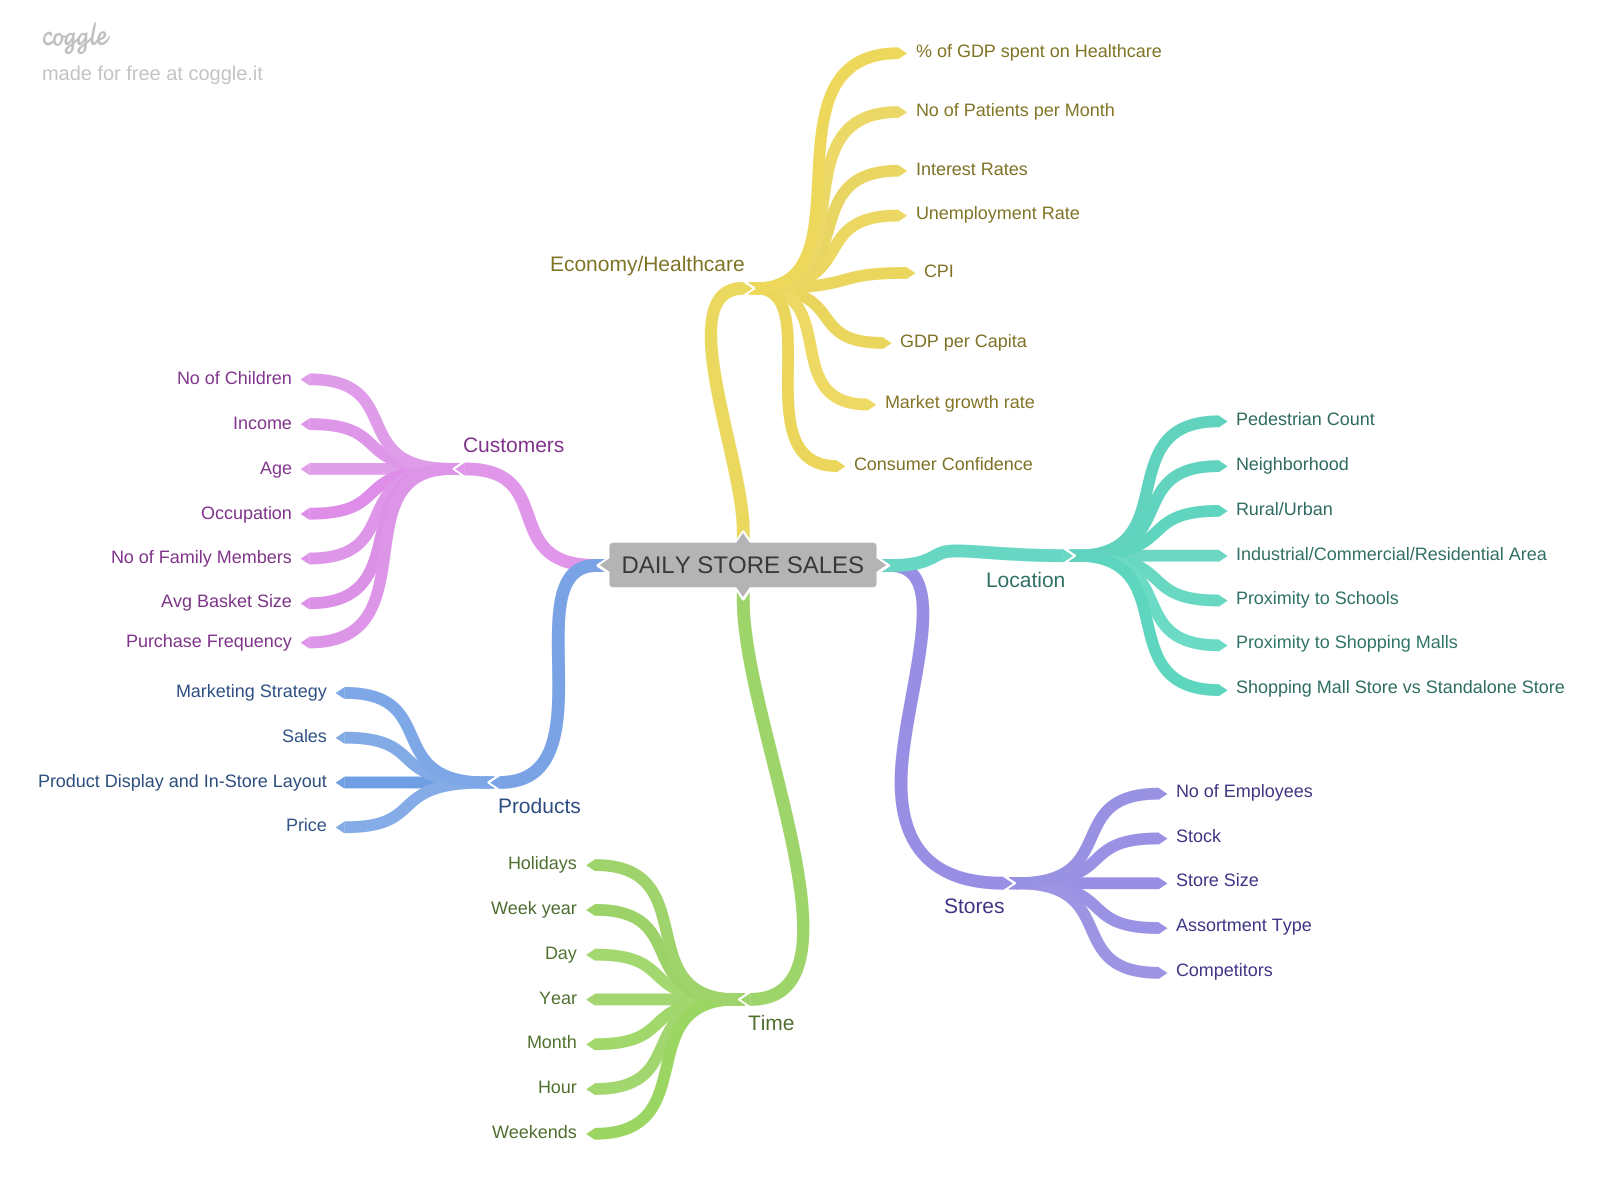

In [11]:
Image('img/DAILY_STORE_SALES.png' )

## 2.2. Hypothesis Creation

### 2.2.1. Stores

**1.**  Stores with more employees sell more  
**2.**  Stores with bigger available stock sell more  
**3.**  Bigger stores sell more  
**4.**  Stores with extended assortment type sell more  
**5.**  Stores near competitors sell less  
**6.**  Stores with newly opened competitors nearby sell less than stores with old competitors  


### 2.2.2. Time

**1.**  Stores sell more on weekdays than weekends/holidays (sales rate)  
**2.**  Stores sell more during the 2nd semester  
**3.**  Stores sell more during summer/winter breaks (schools)    
**4.**  Stores sell more during school holidays  
**5.**  Stores opened during Christmas sell more    
**6.**  Stores sell more along the years  
**7.**  Stores sell more after day 10 of each month  
**8.**  Stores sell more along the years  


### 2.2.3. Products

**1.**  Stores with higher marketing investments sell more  
**2.**  Stores with products in promotion displayed at the entrance sell more  
**3.**  Stores with cheaper products sell more    
**4.**  Stores with aggresive price strategies sell more  
**5.**  Stores frequently doing standalone promo sales sell more  
**6.**  Stores doing consecutive promo sales in the beginning of the year sell more  
**7.**  Stores participating in consecutive promo for a longer time sell more  
**8.**  Stores with more consecutive promo sale days sell more  

### 2.2.4. Customers 
note: number of customers is not possible to be used on the model unless a customer prediction project is done.

**1.**  Stores with more customers who have children sell more  
**2.**  Stores with more customers who have higher income sell more  
**3.**  Stores with more elderly customers sell more   
**4.**  Stores with more customers who have higher # of family members sell more  
**5.**  Stores with more loyal customers sell more  


### 2.2.5. Location
note: Location of each store is not given. Hypothesis are displayed below just for the purpose of completeness.

**1.**  Stores with higher pedestrian count (front street) sell more  
**2.**  Stores located in an expensive neighborhood sell more  
**3.**  Stores located in urban areas sell more    
**4.**  Stores located in residential areas sell more   
**5.**  Stores near schools sell more  
**6.**  Stores near shopping malls sell more  
**7.**  Stores located inside malls sell more than standalone stores  

### 2.2.6. Economy/Healthcare
note: Usually macroeconomic data would not be relevant to the model since its impact tend to affect all stores as a whole. However, some macroeconomic data could be relevant if divided by location and month/week. Since such kind of data is difficult to find, hypothesis are displayed below just for the purpose of completeness. 

**1.**  Stores within areas with low unemployment rate sell more  
**2.**  Stores within areas with high number of patients sell more  
**3.**  Stores within areas with high GDPpc sell more    

## 2.3. Viable Hypothesis List

**1.**  Stores with extended assortment type sell more  
**2.**  Stores near competitors sell less  
**3.**  Stores with newly opened competitors nearby sell less than stores with old competitors  
**4.**  Stores sell more on weekdays than weekends/holidays (sales rate)  
**5.**  Stores sell more during the 2nd semester  
**6.**  Stores sell more during summer/winter breaks (schools)    
**7.**  Stores sell more during school holidays  
**8.**  Stores opened during Christmas sell more    
**9.**  Stores sell more along the years  
**10.**  Stores sell more after day 10 of each month  
**11.**  Stores frequently doing standalone promo sales sell more   
**12.**  Stores doing consecutive promo sales in the beginning of the year sell more  
**13.**  Stores participating in consecutive promo for a longer time sell more 
**14.**  Stores with more consecutive promo sale days sell more  



## 2.4. Feature Engineering

In [20]:
df2['date'] = pd.to_datetime(df2['date'])

# competition_since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year=x['competition_open_since_year'],
                                                                  month=x['competition_open_since_month'],
                                                                  day=1 ), axis=1 )

# competition_since_month
df2['competition_since_month'] = ((df2['date'] - df2['competition_since']) / 30).apply(lambda x: x.days).astype(int)

# promo2_since
df2['promo2_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo2_since'] = df2['promo2_since'].apply( lambda x: 
                                              datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days=7 ) )

# promo2_time_week
df2['promo2_time_week'] = ((df2['date'] - df2['promo2_since']) / 7).apply(lambda x: x.days).astype(int)

# promo2_time_month
df2['promo2_time_month'] = ((df2['date'] - df2['promo2_since']) / 30).apply(lambda x: x.days).astype(int)

# day, month, year
df2['day'] = df2['date'].dt.day
df2['month'] = df2['date'].dt.month
df2['year'] = df2['date'].dt.year

# is_weekday
df2['is_weekday'] = df2.apply(lambda x: 1 if x['date'].weekday() in [0,1,2,3,4] 
                              else 1 if x['state_holiday'] == 0
                              else 0, axis = 1)


In [87]:
# assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a'
                                            else 'extra' if x == 'b'
                                            else 'extended')
# state_holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a'
                                                  else 'easter' if x == 'b'
                                                  else 'christmas' if x == 'c'
                                                  else 'regular_day')

# 3.0. STEP 03 - FILTERING VARIABLES (according to business restritions)

In [88]:
df3 = df2.copy()

## 3.1. Filtering Rows

In [89]:
# We will exclude closed stores with zero sales
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo,competition_since,competition_since_month,promo2_since,promo2_time_week,promo2_time_month,day,month,year,is_weekday
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,Jul,0,2008-09-01,84,2015-07-27,0,0,31,7,2015,1
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1,2007-11-01,94,2010-03-22,279,65,31,7,2015,1
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1,2006-12-01,105,2011-03-28,226,52,31,7,2015,1
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,Jul,0,2009-09-01,71,2015-07-27,0,0,31,7,2015,1
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,Jul,0,2015-04-01,4,2015-07-27,0,0,31,7,2015,1


## 3.2. Column Selection

In [95]:
# customers won't be needed since there is no way to know # of customers by the prediction time. Other columns were auxiliary ones.
cols_drop = ['customers', 'promo_interval', 'open', 'month_map']
df3 = df3.drop(cols_drop, axis = 1)

In [107]:
df3 = df3[['store', 'date', 'day', 'month', 'year','sales','day_of_week','is_weekday','state_holiday','school_holiday',
     'store_type', 'assortment', 'competition_distance', 'competition_open_since_month', 'competition_open_since_year',
     'competition_since', 'competition_since_month', 'promo', 'is_promo2','promo2', 'promo2_since', 'promo2_since_week', 
     'promo2_since_year', 'promo2_time_week', 'promo2_time_month']]

In [110]:
df3.to_csv(r'data/df3.csv', index = False)